# Matplotlib

Matplotlib ist ein Python-Modul zur Erzeugung grafischer Darstellungen. Es nutzt die Array-Struktur von NumPy und eignet sich daher sehr gut für die Visualisierung von sehr großen Datenmengen. In der Matplotlib-Bibliothek sind viele veschiedene 2D- und 3D-Grafiken enthalten

Mehr zu Matplotlib auf der offiziellen Website: http://matplotlib.org/

### Download von Matplotlib

In [1]:
# nicht starten, da Matplotlib bereits installiert wurde und die notwendigen Rechte fehlen
!pip3 install matplotlib

### Verwenden von Matplotlib

In [25]:

import numpy as np


In [4]:
t = np.arange(0.0, 6.29, 0.1)
y = 5*np.sin(t)

In [1]:

# Diagramm wird erzeugt
# Methode plot() legt fest, dass die Werte der Liste y über t aufgetragen werden
# Liniendicke von 2 Pixeln

# Beschriftung des Diagramm

# dünnes gestricheltes Liniennetz im Diagramm

# Anzeige

## Mehrere Funktionen in einem XY-Diagramm

In [2]:

# "r+" steht für für red meinem einem Pluszeichen an jedem Funktionswert
# "bo" steht für blue mit einem Kreis zur Markierung der Funktionswerte


## Weitere Diagrammtypen

### Balkendiagramme

In [3]:
quartal = [1,2,3,4]
umsatz = [120000,154000,133000,198000]


### Histogramme

In [5]:
# Häufigkeitsverteilung
# zahlen = np.random.randn(10000)


## Anmerkungen

In [6]:
# t = np.arange(0.0, 6.4, 0.1)
# y = 5*np.sin(t)


## Legenden

In [7]:
# t = np.arange(0.0, 6.4, 0.1)
# y = 5*np.sin(t)
# z = 3*np.cos(t)


# Beispiele

## Mandelbrot-Fraktal

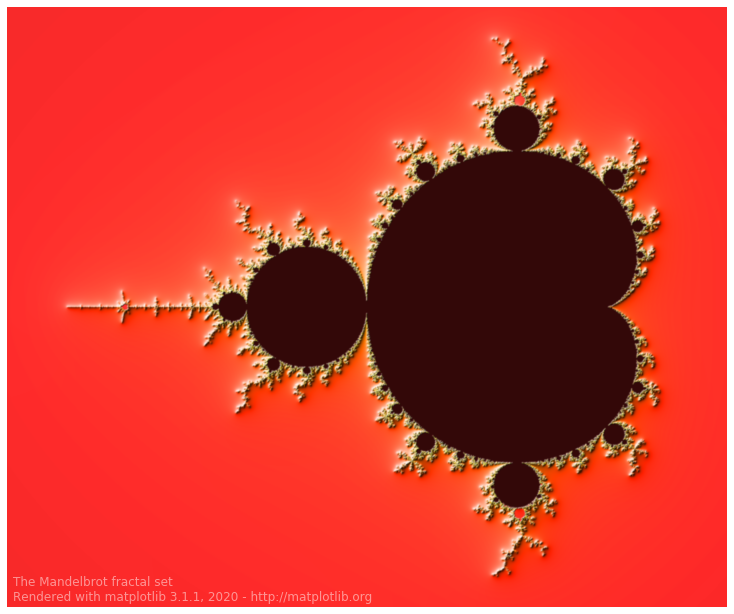

In [28]:
import numpy as np


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = abs(Z) < horizon
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000 // 2
    ymin, ymax, yn = -1.25, +1.25, 2500 // 2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log2(np.log(horizon))
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 - np.log2(np.log(abs(Z))) + log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    ax.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s, %s - http://matplotlib.org"
            % (matplotlib.__version__, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()

## 3D Surface Plot

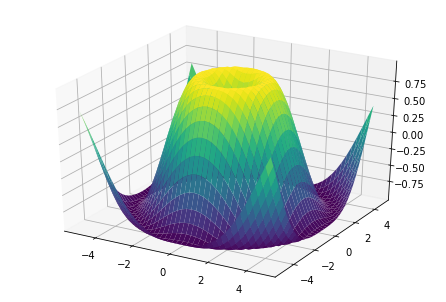

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

## MRT-Aufnahme mit Elektroenzephalografie (EEG) und dessen Intensitätshistogram

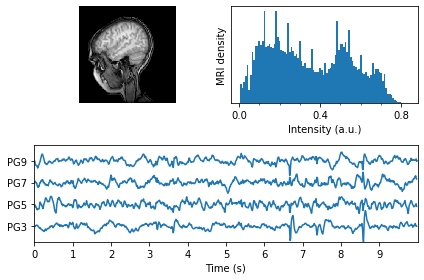

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.cm as cm

from matplotlib.collections import LineCollection
from matplotlib.ticker import MultipleLocator

fig = plt.figure("MRI_with_EEG")

# Load the MRI data (256x256 16 bit integers)
with cbook.get_sample_data('s1045.ima.gz') as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

# Plot the MRI image
ax0 = fig.add_subplot(2, 2, 1)
ax0.imshow(im, cmap=cm.gray)
ax0.axis('off')

# Plot the histogram of MRI intensity
ax1 = fig.add_subplot(2, 2, 2)
im = np.ravel(im)
im = im[np.nonzero(im)]  # Ignore the background
im = im / (2**16 - 1)  # Normalize
ax1.hist(im, bins=100)
ax1.xaxis.set_major_locator(MultipleLocator(0.4))
ax1.minorticks_on()
ax1.set_yticks([])
ax1.set_xlabel('Intensity (a.u.)')
ax1.set_ylabel('MRI density')

# Load the EEG data
n_samples, n_rows = 800, 4
with cbook.get_sample_data('eeg.dat') as eegfile:
    data = np.fromfile(eegfile, dtype=float).reshape((n_samples, n_rows))
t = 10 * np.arange(n_samples) / n_samples

# Plot the EEG
ticklocs = []
ax2 = fig.add_subplot(2, 1, 2)
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(10))
dmin = data.min()
dmax = data.max()
dr = (dmax - dmin) * 0.7  # Crowd them a bit.
y0 = dmin
y1 = (n_rows - 1) * dr + dmax
ax2.set_ylim(y0, y1)

segs = []
for i in range(n_rows):
    segs.append(np.column_stack((t, data[:, i])))
    ticklocs.append(i * dr)

offsets = np.zeros((n_rows, 2), dtype=float)
offsets[:, 1] = ticklocs

lines = LineCollection(segs, offsets=offsets, transOffset=None)
ax2.add_collection(lines)

# Set the yticks to use axes coordinates on the y axis
ax2.set_yticks(ticklocs)
ax2.set_yticklabels(['PG3', 'PG5', 'PG7', 'PG9'])

ax2.set_xlabel('Time (s)')


plt.tight_layout()
plt.show()